# Customer analysis

In this exercise, you work for a consulting firm as data analyst. One of your clients asked for help to understand its customer buying behavior. 

You dispose of a dataset from its e-commerce website with 13 features : 

- order_id : ID if the order
- order_status : Status of the order
- order_purchase_timestamp : Timestamp of the purchase
- order_delivered_customer_date : Timestamp of the delivery to the customer
- payment_type : Method of payment
- payment_installments : Number of payments for this purchase (does NOT affect the payment value)
- payment_value : Total amount of the payment
- review_score : Score given by the client, ranges from 1 to 5
- customer_unique_id : ID of the customer who purchased
- customer_zip_code_prefix : Zip code of the customer
- customer_city : City of the customer
- customer_state : State of the customer
- product_category_name_english : Name of the product category in English

With this data, you have to analyze customer behavior with two techniques:

- Customer segmentation with RFM
- Cohort analysis from Sept 2016 to October 2018.

At the end, you have to present your analysis with actionable insights to improve the customer relationship of your client. 

# Understanding RFM Segmentation 

❓ What are the 3 metrics used in an RFM Segmentation? (hint : What does RFM stand for?) 

**Recency: The time between the new purchase and the last order placed.**  
**Frequency: How often does the customer buy the same product.**  
**Monetary: Sum of expenses per customer.**  

❓ Can you summarize what each metric measures in one sentence?

**La segmentation RFM consiste à segmenter les clients en fonction de leur comportement d’achat. C’est une segmentation 100% comportementale.**  
*RFM segmentation consists of segmenting customers based on their purchasing behavior. It is 100% behavioral segmentation.*   


❓ What data / or type of data do you need for each metric ? 

**We need datetime metric for calculate the recency.**   
**The columns with all product purchase by customers for calculate the frequency.**   
**And the columns payment values for calculate customers of products number totaly purchase.**   

Let's explore the dataset!

# Exploratory Data Analysis

In [423]:
import pandas as pd
#viz
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import squarify

import warnings
from operator import attrgetter

Load the dataset and start an Exploratory Data Analysis

In [424]:
df_customers = pd.read_csv('data/db_customers.csv')
df_customers

,order_id,order_status,order_purchase_timestamp,order_delivered_customer_date,payment_type,payment_installments,payment_value,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,credit_card,1.0,18.12,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,voucher,1.0,2.00,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,voucher,1.0,18.59,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,boleto,1.0,141.46,4,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,credit_card,3.0,179.12,5,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,auto
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105378,9c5dedf39a927c1b2549525ed64a053c,delivered,2017-03-09 09:54:05,2017-03-17 15:08:01,credit_card,3.0,85.08,5,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,health_beauty
105379,63943bddc261676b46f01ca7ac2f7bd8,delivered,2018-02-06 12:58:58,2018-02-28 17:37:56,credit_card,3.0,195.00,4,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,baby
105380,83c1379a015df1e13d02aae0204711ab,delivered,2017-08-27 14:46:43,2017-09-21 11:24:17,credit_card,5.0,271.01,5,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,home_appliances_2
105381,11c177c8e97725db2631073c19f07b62,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54,credit_card,4.0,441.16,2,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,computers_accessories


❓ Which features should be formated in datetime ? 
Convert them

**'order_purchase_timestamp' is the features that we have to change into time type.**  

❓ Which features are Categorical ? List the unique values on these features.

**Les données catégoriques sont des valeurs pour une variable qualitative, souvent un nombre, un mot ou un symbole. Ils mettent en évidence le fait que la variable dans le cas considéré appartient à l'un des nombreux choix disponibles. Par conséquent, ils appartiennent à l'une des catégories; d'où le nom catégorique.**  
**Categorial columns in dataset customers : payment_installments**  

❓ Check for missing values. What do you notice ? 


In [425]:
df_customers.isnull().sum()

order_id                            0
order_status                        0
order_purchase_timestamp            0
order_delivered_customer_date    3159
payment_type                        1
payment_installments                1
payment_value                       1
review_score                        0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
product_category_name_english    2410
dtype: int64

**We have 3159 NaN in "order_delivered_customer_date"  
and 2410 NaN in "product_category_name_english"**  

❓ Can you find an explanation for the missing `order_delivered_customer_date` ? 
(hint : Check for non delivered orders)

**Maybe its just a forget information**  

❓ What are the proportions of each `order_status` ? 

In [426]:
df_customers['order_status'].value_counts()

delivered      102225
shipped          1180
canceled          669
unavailable       651
invoiced          330
processing        321
created             5
approved            2
Name: order_status, dtype: int64

In [427]:
df_customers['order_status'].value_counts(normalize=True)

delivered      0.970033
shipped        0.011197
canceled       0.006348
unavailable    0.006177
invoiced       0.003131
processing     0.003046
created        0.000047
approved       0.000019
Name: order_status, dtype: float64

❓ Which `order_status` do you think should be removed from the analysis

**canceled unavailable invoiced processing created approved**  

In [371]:
df_customers_new = df_customers[(df_customers['order_status'] != "delivered") & (df_customers['order_status'] != "shipped")].index
df_customers.drop(df_customers_new , inplace=True)
df_customers['order_status'].value_counts()

delivered    102225
shipped        1180
Name: order_status, dtype: int64

In [372]:
df_customers

,order_id,order_status,order_purchase_timestamp,order_delivered_customer_date,payment_type,payment_installments,payment_value,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,credit_card,1.0,18.12,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,voucher,1.0,2.00,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,voucher,1.0,18.59,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,boleto,1.0,141.46,4,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,credit_card,3.0,179.12,5,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,auto
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105378,9c5dedf39a927c1b2549525ed64a053c,delivered,2017-03-09 09:54:05,2017-03-17 15:08:01,credit_card,3.0,85.08,5,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,health_beauty
105379,63943bddc261676b46f01ca7ac2f7bd8,delivered,2018-02-06 12:58:58,2018-02-28 17:37:56,credit_card,3.0,195.00,4,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,baby
105380,83c1379a015df1e13d02aae0204711ab,delivered,2017-08-27 14:46:43,2017-09-21 11:24:17,credit_card,5.0,271.01,5,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,home_appliances_2
105381,11c177c8e97725db2631073c19f07b62,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54,credit_card,4.0,441.16,2,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,computers_accessories


# RFM

In [373]:
df_recence = df_customers[['order_id', 'order_purchase_timestamp', 'customer_unique_id']]

In [374]:
df_recence

,order_id,order_purchase_timestamp,customer_unique_id
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff
1,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff
2,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff
3,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,af07308b275d755c9edb36a90c618231
4,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,3a653a41f6f9fc3d2a113cf8398680e8
...,...,...,...
105378,9c5dedf39a927c1b2549525ed64a053c,2017-03-09 09:54:05,6359f309b166b0196dbf7ad2ac62bb5a
105379,63943bddc261676b46f01ca7ac2f7bd8,2018-02-06 12:58:58,da62f9e57a76d978d02ab5362c509660
105380,83c1379a015df1e13d02aae0204711ab,2017-08-27 14:46:43,737520a9aad80b3fbbdad19b66b37b30
105381,11c177c8e97725db2631073c19f07b62,2018-01-08 21:28:27,5097a5312c8b157bb7be58ae360ef43c


In [375]:
import datetime as dt
#change type in date
df_recence['order_purchase_timestamp'] = pd.to_datetime(df_recence['order_purchase_timestamp'])
#stock la date max du dataset
today_date = df_recence['order_purchase_timestamp'].max()
#groupby
df_recence = df_recence.groupby("customer_unique_id").agg(max_date=('order_purchase_timestamp', "max"))
df_recence["recence"] = df_recence['max_date']-today_date

<ipython-input-375-b878ba80299e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recence['order_purchase_timestamp'] = pd.to_datetime(df_recence['order_purchase_timestamp'])


In [376]:
#change type only time
df_recence['recence']= df_recence['recence'].astype("timedelta64[D]")

In [377]:
df_recence

,max_date,recence
customer_unique_id,,
0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,-116.0
0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,-119.0
0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,-542.0
0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,-326.0
0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,-293.0
...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36,-452.0
fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,-267.0
ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16,-573.0


In [378]:
df_frequence = df_customers[['order_id', 'customer_unique_id']]

In [379]:
df_frequence

,order_id,customer_unique_id
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff
1,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff
2,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff
3,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231
4,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8
...,...,...
105378,9c5dedf39a927c1b2549525ed64a053c,6359f309b166b0196dbf7ad2ac62bb5a
105379,63943bddc261676b46f01ca7ac2f7bd8,da62f9e57a76d978d02ab5362c509660
105380,83c1379a015df1e13d02aae0204711ab,737520a9aad80b3fbbdad19b66b37b30
105381,11c177c8e97725db2631073c19f07b62,5097a5312c8b157bb7be58ae360ef43c


In [380]:
df_frequence = df_frequence.groupby("customer_unique_id").agg(frequence=('order_id', "count"))

In [381]:
df_frequence

,frequence
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,1
0000b849f77a49e4a4ce2b2a4ca5be3f,1
0000f46a3911fa3c0805444483337064,1
0000f6ccb0745a6a4b88665a16c9f078,1
0004aac84e0df4da2b147fca70cf8255,1
...,...
fffcf5a5ff07b0908bd4e2dbc735a684,1
fffea47cd6d3cc0a88bd621562a9d061,1
ffff371b4d645b6ecea244b27531430a,1


In [382]:
df_frequence['frequence'].value_counts()

1     88115
2      4990
3       765
4       279
5        85
6        68
7        32
8        14
9        10
11        7
12        7
10        6
13        4
14        3
15        3
24        3
19        2
16        1
22        1
23        1
26        1
29        1
54        1
Name: frequence, dtype: int64

In [383]:
df_montant = df_customers[['customer_unique_id', 'payment_value']]
df_montant

,customer_unique_id,payment_value
0,7c396fd4830fd04220f754e42b4e5bff,18.12
1,7c396fd4830fd04220f754e42b4e5bff,2.00
2,7c396fd4830fd04220f754e42b4e5bff,18.59
3,af07308b275d755c9edb36a90c618231,141.46
4,3a653a41f6f9fc3d2a113cf8398680e8,179.12
...,...,...
105378,6359f309b166b0196dbf7ad2ac62bb5a,85.08
105379,da62f9e57a76d978d02ab5362c509660,195.00
105380,737520a9aad80b3fbbdad19b66b37b30,271.01
105381,5097a5312c8b157bb7be58ae360ef43c,441.16


In [384]:
df_montant = df_montant.groupby('customer_unique_id').agg(montant = ("payment_value","sum"))

In [385]:
df_montant

,montant
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
0000f46a3911fa3c0805444483337064,86.22
0000f6ccb0745a6a4b88665a16c9f078,43.62
0004aac84e0df4da2b147fca70cf8255,196.89
...,...
fffcf5a5ff07b0908bd4e2dbc735a684,2067.42
fffea47cd6d3cc0a88bd621562a9d061,84.58
ffff371b4d645b6ecea244b27531430a,112.46


In [386]:
df_frequrec = df_frequence.merge(df_recence, left_on= 'customer_unique_id', right_on= 'customer_unique_id', how= 'right')

In [387]:
df_frequrec

,frequence,max_date,recence
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,1,2018-05-10 10:56:27,-116.0
0000b849f77a49e4a4ce2b2a4ca5be3f,1,2018-05-07 11:11:27,-119.0
0000f46a3911fa3c0805444483337064,1,2017-03-10 21:05:03,-542.0
0000f6ccb0745a6a4b88665a16c9f078,1,2017-10-12 20:29:41,-326.0
0004aac84e0df4da2b147fca70cf8255,1,2017-11-14 19:45:42,-293.0
...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,1,2017-06-08 21:00:36,-452.0
fffea47cd6d3cc0a88bd621562a9d061,1,2017-12-10 20:07:56,-267.0
ffff371b4d645b6ecea244b27531430a,1,2017-02-07 15:49:16,-573.0


In [388]:
df_full = df_frequrec.merge(df_montant, left_on= 'customer_unique_id', right_on= 'customer_unique_id', how= 'right')

In [389]:
df_full

,frequence,max_date,recence,montant
customer_unique_id,,,,
0000366f3b9a7992bf8c76cfdf3221e2,1,2018-05-10 10:56:27,-116.0,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,1,2018-05-07 11:11:27,-119.0,27.19
0000f46a3911fa3c0805444483337064,1,2017-03-10 21:05:03,-542.0,86.22
0000f6ccb0745a6a4b88665a16c9f078,1,2017-10-12 20:29:41,-326.0,43.62
0004aac84e0df4da2b147fca70cf8255,1,2017-11-14 19:45:42,-293.0,196.89
...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,1,2017-06-08 21:00:36,-452.0,2067.42
fffea47cd6d3cc0a88bd621562a9d061,1,2017-12-10 20:07:56,-267.0,84.58
ffff371b4d645b6ecea244b27531430a,1,2017-02-07 15:49:16,-573.0,112.46


In [390]:
df_full.describe()

,frequence,recence,montant
count,94399.000000,94399.000000,94399.000000
mean,1.095404,-242.864151,168.250134
std,0.530304,152.723192,232.880460
min,1.000000,-729.000000,0.000000
25%,1.000000,-352.000000,63.110000
50%,1.000000,-224.000000,108.100000
75%,1.000000,-119.000000,184.590000
max,54.000000,0.000000,13664.080000


In [391]:
quintiles = df_full[['recence', 'frequence', 'montant']].quantile([.2, .4, .6, .8]).to_dict()
quintiles

{'recence': {0.2: -388.0, 0.4: -273.0, 0.6: -182.0, 0.8: -97.0},
 'frequence': {0.2: 1.0, 0.4: 1.0, 0.6: 1.0, 0.8: 1.0},
 'montant': {0.2: 55.36999999999999, 0.4: 87.58, 0.6: 133.42, 0.8: 211.48}}

In [392]:
def r_score(x):
    if x <= quintiles['recence'][.2]:
        return 5
    elif x <= quintiles['recence'][.4]:
        return 4
    elif x <= quintiles['recence'][.6]:
        return 3
    elif x <= quintiles['recence'][.8]:
        return 2
    else:
        return 1

def fm_score(x, c):
    if x <= quintiles[c][.2]:
        return 1
    elif x <= quintiles[c][.4]:
        return 2
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 4
    else:
        return 5

In [393]:
df_full['R'] = df_full['recence'].apply(lambda x: r_score(x))
df_full['F'] = df_full['frequence'].apply(lambda x: fm_score(x, 'frequence'))
df_full['M'] = df_full['montant'].apply(lambda x: fm_score(x, 'montant'))

In [394]:
df_full

,frequence,max_date,recence,montant,R,F,M
customer_unique_id,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,1,2018-05-10 10:56:27,-116.0,141.90,2,1,4
0000b849f77a49e4a4ce2b2a4ca5be3f,1,2018-05-07 11:11:27,-119.0,27.19,2,1,1
0000f46a3911fa3c0805444483337064,1,2017-03-10 21:05:03,-542.0,86.22,5,1,2
0000f6ccb0745a6a4b88665a16c9f078,1,2017-10-12 20:29:41,-326.0,43.62,4,1,1
0004aac84e0df4da2b147fca70cf8255,1,2017-11-14 19:45:42,-293.0,196.89,4,1,4
...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,1,2017-06-08 21:00:36,-452.0,2067.42,5,1,5
fffea47cd6d3cc0a88bd621562a9d061,1,2017-12-10 20:07:56,-267.0,84.58,3,1,2
ffff371b4d645b6ecea244b27531430a,1,2017-02-07 15:49:16,-573.0,112.46,5,1,3


In [395]:
df_full['RFM Score'] = df_full['R'].map(str) + df_full['F'].map(str) + df_full['M'].map(str)
df_full.head()

,frequence,max_date,recence,montant,R,F,M,RFM Score
customer_unique_id,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,1,2018-05-10 10:56:27,-116.0,141.90,2,1,4,214
0000b849f77a49e4a4ce2b2a4ca5be3f,1,2018-05-07 11:11:27,-119.0,27.19,2,1,1,211
0000f46a3911fa3c0805444483337064,1,2017-03-10 21:05:03,-542.0,86.22,5,1,2,512
0000f6ccb0745a6a4b88665a16c9f078,1,2017-10-12 20:29:41,-326.0,43.62,4,1,1,411
0004aac84e0df4da2b147fca70cf8255,1,2017-11-14 19:45:42,-293.0,196.89,4,1,4,414


In [396]:
df_full = df_full.reset_index(inplace=False)

In [397]:
df_full

,customer_unique_id,frequence,max_date,recence,montant,R,F,M,RFM Score
0,0000366f3b9a7992bf8c76cfdf3221e2,1,2018-05-10 10:56:27,-116.0,141.90,2,1,4,214
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,2018-05-07 11:11:27,-119.0,27.19,2,1,1,211
2,0000f46a3911fa3c0805444483337064,1,2017-03-10 21:05:03,-542.0,86.22,5,1,2,512
3,0000f6ccb0745a6a4b88665a16c9f078,1,2017-10-12 20:29:41,-326.0,43.62,4,1,1,411
4,0004aac84e0df4da2b147fca70cf8255,1,2017-11-14 19:45:42,-293.0,196.89,4,1,4,414
...,...,...,...,...,...,...,...,...,...
94394,fffcf5a5ff07b0908bd4e2dbc735a684,1,2017-06-08 21:00:36,-452.0,2067.42,5,1,5,515
94395,fffea47cd6d3cc0a88bd621562a9d061,1,2017-12-10 20:07:56,-267.0,84.58,3,1,2,312
94396,ffff371b4d645b6ecea244b27531430a,1,2017-02-07 15:49:16,-573.0,112.46,5,1,3,513
94397,ffff5962728ec6157033ef9805bacc48,1,2018-05-02 15:17:41,-124.0,133.69,2,1,4,214


In [398]:
segt_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at risk',
    r'[1-2]5': 'can\'t loose',
    r'3[1-2]': 'about to sleep',
    r'33': 'need attention',
    r'[3-4][4-5]': 'loyal customers',
    r'41': 'promising',
    r'51': 'new customers',
    r'[4-5][2-3]': 'potential loyalists',
    r'5[4-5]': 'champions'
}

df_full['Segment'] = df_full['R'].map(str) + df_full['F'].map(str)
df_full['Segment'] = df_full['Segment'].replace(segt_map, regex=True)
df_full.head()

,customer_unique_id,frequence,max_date,recence,montant,R,F,M,RFM Score,Segment
0,0000366f3b9a7992bf8c76cfdf3221e2,1,2018-05-10 10:56:27,-116.0,141.90,2,1,4,214,hibernating
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,2018-05-07 11:11:27,-119.0,27.19,2,1,1,211,hibernating
2,0000f46a3911fa3c0805444483337064,1,2017-03-10 21:05:03,-542.0,86.22,5,1,2,512,new customers
3,0000f6ccb0745a6a4b88665a16c9f078,1,2017-10-12 20:29:41,-326.0,43.62,4,1,1,411,promising
4,0004aac84e0df4da2b147fca70cf8255,1,2017-11-14 19:45:42,-293.0,196.89,4,1,4,414,promising


In [399]:
df_full['Segment'].value_counts()

hibernating        35186
promising          17672
new customers      17640
about to sleep     17617
loyal customers     2530
can't loose         2498
champions           1256
Name: Segment, dtype: int64

C:\Users\Simplon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


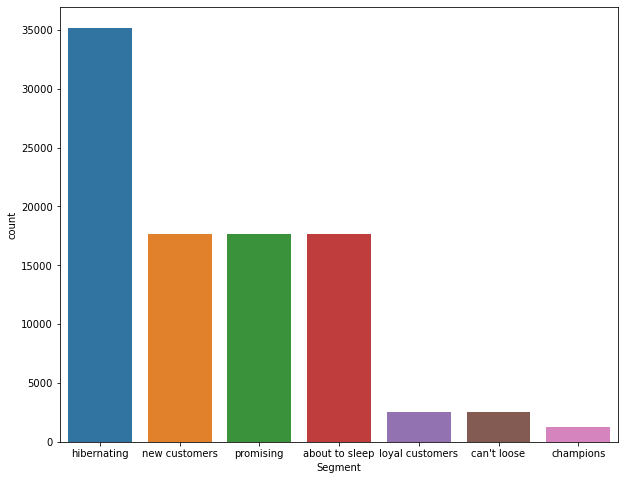

In [400]:
plt.figure(figsize= (10, 8))

sns.countplot(df_full['Segment'])

plt.show()

# 

# 

# 

❓ What feature would you choose in the e-commerce dataset provided? 

❓ What method would you use to group the data? 

❓ What feature would you use to group the data? 

Group the data. (Hint: you can carry out the grouping one by one and then merge, or even better use the .agg method and get a robust grouping in one line of code)

What type of data is the R supposed to be? Is it in the right format? (Hint : investigate the difference between `datetime` and `timedelta`) 

So there is one more step to carry out before the data is ready : Calculate the recency base on the date of the purchase

❓ What is the date of the least purchase?

❓What is the date of the most recent purchase?

❓What is the date of the most recent purchase?

❓How would you calculate the recency? (hint: what date would you use to compare with the purchase date? Today? probably not...)

Create a feature calculating the difference between `the most recent purchased + 1 day`, and `order_purchase_timestamp`.

Now that you have created a new dataset with the right columns, explore it to understand what you created.

❓Which column is the R? The F? The M?

Now for each metric independantly, build clutsers (Hint 1: you can use `.describe()` to have insights about each metrics. Hint 2: Don't choose more than 3 clusters)

Now that you have clusters for each category, explain the different buying behaviors

# Working with cohorts

❓What is a cohort? 

**Une cohorte est simplement un groupe de personnes ayant des caractéristiques communes.**  

**L'analyse de cohorte est un type d'analyse comportementale dans lequel vous regroupez vos utilisateurs en fonction de leurs caractéristiques communes afin de mieux suivre et comprendre leurs actions. L'analyse de cohorte vous permet de poser des questions plus spécifiques et ciblées et de prendre des décisions éclairées sur les produits, ce qui réduira le taux de désabonnement et augmentera considérablement les revenus. On pourrait aussi l'appeler l'analyse du taux de désabonnement des clients.**  

❓Why is it interesting to analyse cohorts ? 

❓What data (already existing in the original dataset) do we need to build a cohort? 

Build a new df with just these 3 features

Using the `pandas.Serie.dt.to_period()` methode, create a new feature converting `order_purchase_timestamp` in months

# 

# 

In [401]:
#df_full['order_month'] = df_full['max_date'].dt.to_period('M')
#df_full['cohort'] = df_full.groupby('customer_unique_id')['max_date']\
#.transform('min')\
#.dt.to_period('M')

In [402]:
#df_full = df_full.sort_values("cohort", axis=0, ascending=True)
#df_full

Create a new feature called `cohort` by grouping the previous df by `customer_unique_id`, and tranforming it's minimum value in months (with the same `pandas.Serie.dt.to_period()` as before)

In [403]:
df_new = df_customers[['order_id', 'order_purchase_timestamp', 'customer_unique_id']]

In [404]:
df_new.dropna()
m = pd.DatetimeIndex(df_new['order_purchase_timestamp'])
df_new['order_month'] = m.to_period('M')

<ipython-input-404-a23a6ae90d54>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['order_month'] = m.to_period('M')


In [405]:
df_new

,order_id,order_purchase_timestamp,customer_unique_id,order_month
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,2017-10
1,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,2017-10
2,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,2017-10
3,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,af07308b275d755c9edb36a90c618231,2018-07
4,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,3a653a41f6f9fc3d2a113cf8398680e8,2018-08
...,...,...,...,...
105378,9c5dedf39a927c1b2549525ed64a053c,2017-03-09 09:54:05,6359f309b166b0196dbf7ad2ac62bb5a,2017-03
105379,63943bddc261676b46f01ca7ac2f7bd8,2018-02-06 12:58:58,da62f9e57a76d978d02ab5362c509660,2018-02
105380,83c1379a015df1e13d02aae0204711ab,2017-08-27 14:46:43,737520a9aad80b3fbbdad19b66b37b30,2017-08
105381,11c177c8e97725db2631073c19f07b62,2018-01-08 21:28:27,5097a5312c8b157bb7be58ae360ef43c,2018-01


In [406]:
#For the teachers, To filter by only the customer that have done 2 or more purchases
df_more =pd.DataFrame(df_new.groupby('customer_unique_id').size()[df_new.groupby('customer_unique_id').size() > 1])
df_new = df_new.merge(df_more, how='left', on='customer_unique_id').rename(columns={0:'na'})

df_new = df_new[df_new['na'].notna()]

In [407]:
df_new['order_purchase_timestamp']= pd.to_datetime(df_new['order_purchase_timestamp']);

In [408]:
df_new['cohort'] = df_new.groupby('customer_unique_id')['order_purchase_timestamp'] \
                 .transform('min') \
                 .dt.to_period('M')

In [409]:
df_new

,order_id,order_purchase_timestamp,customer_unique_id,order_month,na,cohort
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,2017-10,4.0,2017-09
1,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,2017-10,4.0,2017-09
2,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,2017-10,4.0,2017-09
10,e69bfb5eb88e0ed6a785585b27e16dbf,2017-07-29 11:55:02,299905e3934e9e181bfb2e164dd4b4f8,2017-07,2.0,2017-07
11,e69bfb5eb88e0ed6a785585b27e16dbf,2017-07-29 11:55:02,299905e3934e9e181bfb2e164dd4b4f8,2017-07,2.0,2017-07
...,...,...,...,...,...,...
103389,19dba6d1e58b04e7fc820558a38ea398,2018-05-12 13:42:24,9e4accf95024aa6565ca1efcadb96752,2018-05,2.0,2017-09
103395,9115830be804184b91f5c00f6f49f92d,2017-10-04 19:57:37,c716cf2b5b86fb24257cffe9e7969df8,2017-10,2.0,2017-10
103396,9115830be804184b91f5c00f6f49f92d,2017-10-04 19:57:37,c716cf2b5b86fb24257cffe9e7969df8,2017-10,2.0,2017-10
103397,aa04ef5214580b06b10e2a378300db44,2017-01-27 00:30:03,e03dbdf5e56c96b106d8115ac336f47f,2017-01,2.0,2017-01


# 

Now groupby `['cohort', 'order_month']` and aggregate by `nunique()` `customer_unique_id`

In [410]:
df_new = df_new.groupby(['cohort', 'order_month'])\
.agg(n_customers=('customer_unique_id',lambda x: x.nunique()))\
.reset_index(drop=False)

In [411]:
df_new

,cohort,order_month,n_customers
0,2016-10,2016-10,24
1,2016-10,2017-04,1
2,2016-10,2017-07,1
3,2016-10,2017-09,1
4,2016-10,2017-11,1
...,...,...,...
214,2018-06,2018-08,16
215,2018-07,2018-07,295
216,2018-07,2018-08,31
217,2018-08,2018-08,229


Finally, create a feature called `['period_number']` where you substract the `cohort` to the `order_month` and get the `'n'` attribute thanks to the `operator.attrgetter` method

In [412]:
df_new['period_number'] = (df_new.order_month - df_new.cohort).apply(attrgetter('n'))
df_new

,cohort,order_month,n_customers,period_number
0,2016-10,2016-10,24,0
1,2016-10,2017-04,1,6
2,2016-10,2017-07,1,9
3,2016-10,2017-09,1,11
4,2016-10,2017-11,1,13
...,...,...,...,...
214,2018-06,2018-08,16,2
215,2018-07,2018-07,295,0
216,2018-07,2018-08,31,1
217,2018-08,2018-08,229,0


Explore a cohort (for example 2017-01) and try to understand what it shows

In [413]:
df_new[df_new['cohort'] == '2017-01']

,cohort,order_month,n_customers,period_number
11,2017-01,2017-01,77,0
12,2017-01,2017-02,3,1
13,2017-01,2017-03,2,2
14,2017-01,2017-04,1,3
15,2017-01,2017-05,3,4
16,2017-01,2017-06,1,5
17,2017-01,2017-07,3,6
18,2017-01,2017-08,1,7
19,2017-01,2017-09,1,8
20,2017-01,2017-11,3,10


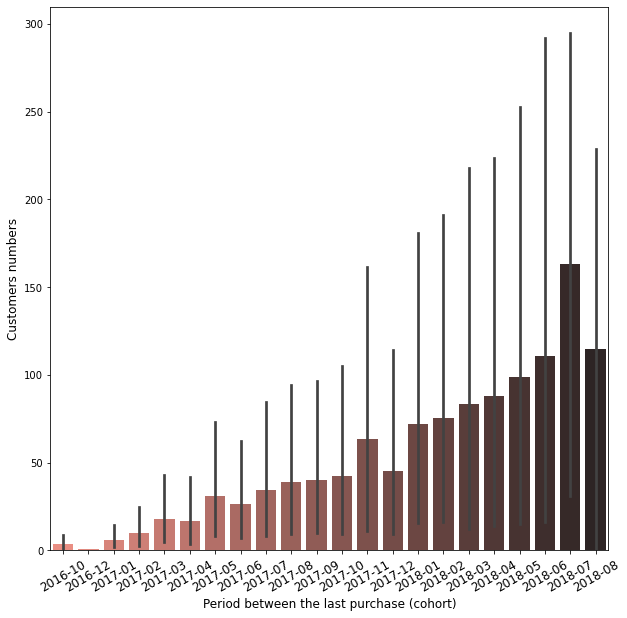

In [414]:
plt.figure(figsize= (10, 10)) #size

sns.barplot(x= "cohort", y = "n_customers", data=df_new, palette = "dark:salmon_r") #plot and color

#sizes barticks
plt.xticks(fontsize=12, rotation= 30)
#size titles
plt.xlabel('Period between the last purchase (cohort)', fontsize=12)
plt.ylabel('Customers numbers', fontsize=12)

plt.show()

Pivot the DataFrame using the methode : `DataFrame.pivot_table` (hint : use `'cohort'` as `index`, `'period_number'` as columns, and `'n_customers'` as `values`)

In [415]:
df_pivot = df_new.pivot_table(index = 'cohort', columns= 'period_number', values= 'n_customers')
df_pivot

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20
cohort,,,,,,,,,,,,,,,,,,,,
2016-10,24.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,2.0,2.0
2016-12,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,77.0,3.0,2.0,1.0,3.0,1.0,3.0,1.0,1.0,NaN,3.0,1.0,5.0,3.0,1.0,1.0,2.0,3.0,1.0,NaN
2017-02,132.0,4.0,5.0,2.0,7.0,2.0,4.0,3.0,2.0,3.0,2.0,5.0,2.0,3.0,2.0,1.0,1.0,3.0,NaN,NaN
2017-03,223.0,13.0,9.0,10.0,9.0,4.0,4.0,8.0,8.0,2.0,9.0,3.0,5.0,3.0,4.0,6.0,2.0,4.0,NaN,NaN
2017-04,210.0,14.0,5.0,4.0,7.0,6.0,8.0,7.0,7.0,4.0,6.0,2.0,1.0,1.0,2.0,2.0,3.0,NaN,NaN,NaN
2017-05,342.0,17.0,17.0,13.0,11.0,12.0,15.0,5.0,9.0,9.0,9.0,12.0,9.0,1.0,7.0,8.0,NaN,NaN,NaN,NaN
2017-06,274.0,14.0,11.0,12.0,8.0,11.0,11.0,7.0,4.0,7.0,9.0,10.0,5.0,4.0,6.0,NaN,NaN,NaN,NaN,NaN
2017-07,354.0,20.0,13.0,9.0,11.0,8.0,12.0,4.0,7.0,10.0,8.0,11.0,5.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN


Now divide all the values (except you column 0) by the column 0 and name this new DataFrame `retention_matrix`

In [416]:
cohort_size= df_pivot.iloc[:,0]
retention_matrix = df_pivot.divide(cohort_size, axis=0)

Plot your `retention matrix` using the code below : 

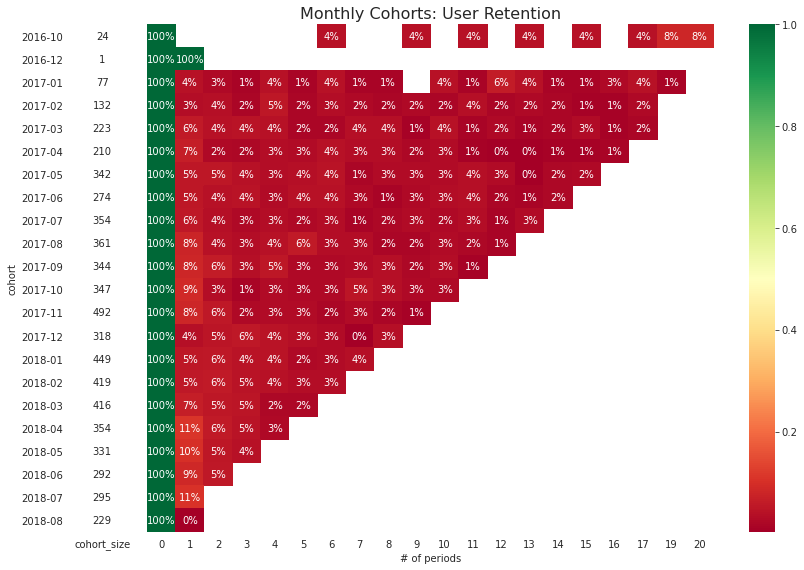

In [417]:
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # retention matrix
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='RdYlGn', 
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()

What do you notice? 

How could we have know that before? (hint : Calculate the percentage of customers who have ordered more than once)

Here is the code for the analysis of customers who have bought more than once : 

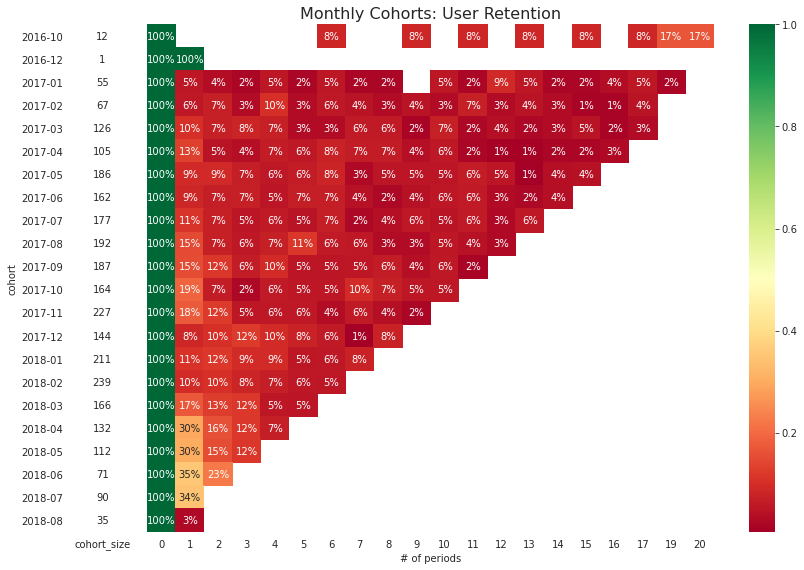

In [418]:
#start from your df created doing the RFM segmentation
df_c = df_customers[['customer_unique_id', 'order_id',
           'order_purchase_timestamp']].drop_duplicates()

m = pd.DatetimeIndex(df_c['order_purchase_timestamp'])
df_c['order_month'] = m.to_period('M')

df_more = pd.DataFrame(df_c.groupby('customer_unique_id').size()[
                       df_c.groupby('customer_unique_id').size() > 1])

df_c = df_c.merge(df_more, how='left', on='customer_unique_id').rename(columns={0: 'na'})

df_c = df_c[df_c['na'].notna()]

df_c['order_purchase_timestamp']= pd.to_datetime(df_c['order_purchase_timestamp']);

df_c['cohort'] = df_c.groupby('customer_unique_id')['order_purchase_timestamp']\
.transform('min').dt.to_period('M')

df_cohort = df_c.groupby(['cohort', 'order_month']) \
    .agg(n_customers=('customer_unique_id', 'nunique')) \
    .reset_index(drop=False)
df_cohort['period_number'] = (df_cohort.order_month - df_cohort.cohort).apply(attrgetter('n'))
cohort_pivot = df_cohort.pivot_table(index='cohort',
                                     columns='period_number',
                                     values='n_customers')
cohort_size = cohort_pivot.iloc[:, 0]
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)

with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={
                           'width_ratios': [1, 11]})

    # retention matrix
    sns.heatmap(retention_matrix,
                mask=retention_matrix.isnull(),
                annot=True,
                fmt='.0%',
                cmap='RdYlGn',
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(
        columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df,
                annot=True,
                cbar=False,
                fmt='g',
                cmap=white_cmap,
                ax=ax[0])

    fig.tight_layout()

In [419]:
#df_new.to_csv('df_pfm_cohort.csv', index=False)

In [420]:
#df_full.to_csv('df_pfm.csv', index=False)